<center><font size="7"><b>Inference</b></font></center>

### This notebook was developed to perform inference of the trained model. The notebook has 3 main parts where in first section model is exported for further use. In second part inference is performed on images that were not used during training. All results are discussed in the last section.

## <b>1. Import modules required for this notebook</b>

In [106]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from PIL import Image
import IPython.display
from shutil import rmtree
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

## <b>2. Get paths for directories that will be used further in the code</b>

In [2]:
cur_dir = os.getcwd()

In [3]:
main_dir = os.path.dirname(cur_dir)
figures_dir = os.path.join(main_dir, "figures")
scripts_dir = os.path.join(main_dir, "scripts")
work_dir = os.path.join(main_dir, "public/Birds")
models_dir = os.path.join(main_dir, "models")
inference_dir = os.path.join(main_dir, "inference")
labels_path = os.path.join(work_dir, "label_map.pbtxt")

## <b>3. Set variable that will store a path to the chosen model</b>

In [67]:
model_name = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_4"

In [68]:
model_path = os.path.join(models_dir, model_name)

## <b>4. Export a model</b>

### Display available checkpoints

In [69]:
%cd $model_path
checkpoints = []
with open("checkpoint") as f:
    file = f.read()
    checkpoints = re.findall('all_model_checkpoint_paths: ".*?"', file)
print("Checkpoints available:")
for i in checkpoints:
    print(i.split(" ")[1])

/home/michal/MSc_lin/7144COMP/Coursework_2/models/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_4
Checkpoints available:
"ckpt-20"
"ckpt-21"
"ckpt-22"
"ckpt-23"
"ckpt-24"
"ckpt-25"
"ckpt-26"


### Set which checkpoint to export

In [70]:
checkpoint_num = 26

In [71]:
with open("checkpoint", "w") as f:
    # Set checkpoint number
    file = re.sub('model_checkpoint_path: ".*?"', 'model_checkpoint_path: "ckpt-{}"'.format(checkpoint_num), file)
    
    f.write(file)

In [72]:
saved_model_name = model_name + "_" + str(checkpoint_num)

In [73]:
output_dir = os.path.join(model_path, saved_model_name)

In [11]:
%cd $scripts_dir
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path $model_path/pipeline.config --trained_checkpoint_dir $model_path --output_directory $output_dir

/home/michal/MSc_lin/7144COMP/Coursework_2/scripts
2021-01-03 08:59:53.733858: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-01-03 08:59:55.067085: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-01-03 08:59:55.104250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-03 08:59:55.104690: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:1c:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.86GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2021-01-03 08:59:55.104708: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-01-03 08:5

### Set a path to the exported model

In [74]:
saved_model_path = os.path.join(output_dir, "saved_model")

## <b>5. Inference</b>

### <b>5.1 Load paths for inference images</b>

In [75]:
image_paths = []
for filename in os.listdir(inference_dir):
    if os.path.isfile(os.path.join(inference_dir, filename)):
        image_paths.append(os.path.join(inference_dir, filename))

### <b>5.2 Load exported model</b>

In [76]:
detect_fn = tf.saved_model.load(saved_model_path)

### <b>5.3 Load class labels</b>

In [77]:
category_index = label_map_util.create_category_index_from_labelmap(labels_path, use_display_name=True)

### <b>5.4 Create directory structure for inference results</b>

In [78]:
inf_results = os.path.join(inference_dir, saved_model_name)
if os.path.exists(inf_results):
    rmtree(inf_results)
os.mkdir(inf_results)

### Set dataframe for the inference results

In [79]:
index = os.listdir(inference_dir)
for name in index:
    if "jpg" not in name:
        index.remove(name)

### <b>5.5 Perform inference</b>

### It is important to note that minimum score threshold is set to 0.60 which means that bounding boxes will be drawn only for detection with at least 60% score confidence. Further inference results analysis will also be based on this value. 0.60 was chosen to ensure that final model perform well detecting most of the well represented birds on images and to reduce number of bounding boxes shown as the majority of the detections have score below 0.60. Morover it was observed that often wrong detections reached high confidence scores in the range of 40%-60% and sometimes even greater. Of course it is impossible to avoid wrong detections but this problem will be discussed later in this notebook.

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_71.jpg... Done


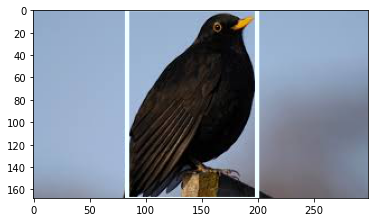

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_23.jpg... Done


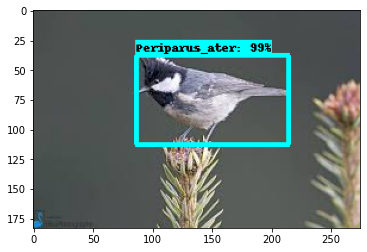

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_66.jpg... Done


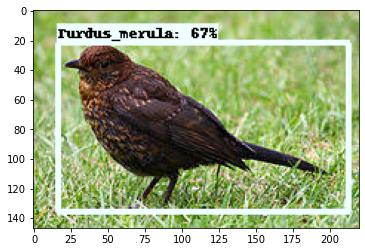

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_67.jpg... Done


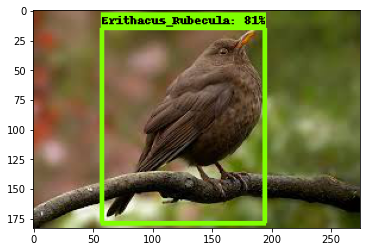

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_15.jpg... Done


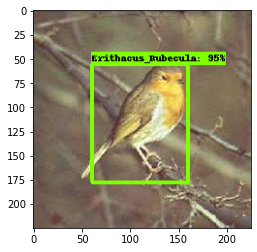

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_10.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_04.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_35.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_78.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_76.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_49.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_03.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_40.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_77.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/inference_09.jpg... Done


In [107]:
%matplotlib inline

# Loop through all inference images and perform detection
i = 0
scores = []
for image_path in image_paths:
    print("Running inference for {}... ".format(image_path), end="")
    
    # Load image
    image_np = np.array(Image.open(image_path))
    
    # Convert image to input tensor
    input_tensor = tf.convert_to_tensor(image_np)
    #  Add axis as model expects a batch o images.
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform detection
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    # Draw bounding boxes 
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          line_thickness=4,
          min_score_thresh=.60,
          agnostic_mode=False)

    # Save information about scores and correct detections to the list
    filename = image_path.split(".")[0].rsplit("/", 1)[1]  
    if int(image_path.split(".")[0].rsplit("_", 1)[1]) < 21:
        if detections['detection_scores'].max() > 0.60:
            if detections['detection_classes'][np.where(detections['detection_scores'] == detections['detection_scores'].max())[0][0]] == 1:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "g"))
            else:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
        else:
            scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
    if 41 > int(image_path.split(".")[0].rsplit("_", 1)[1]) > 20:
        if detections['detection_scores'].max() > 0.60:
            if detections['detection_classes'][np.where(detections['detection_scores'] == detections['detection_scores'].max())[0][0]] == 2:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "g"))
            else:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
        else:
            scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
    if 61 > int(image_path.split(".")[0].rsplit("_", 1)[1]) > 40:
        if detections['detection_scores'].max() > 0.60:
            if detections['detection_classes'][np.where(detections['detection_scores'] == detections['detection_scores'].max())[0][0]] == 3:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "g"))
            else:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
        else:
            scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
    if 81 > int(image_path.split(".")[0].rsplit("_", 1)[1]) > 60:
        if detections['detection_scores'].max() > 0.60:
            if detections['detection_classes'][np.where(detections['detection_scores'] == detections['detection_scores'].max())[0][0]] == 4:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "g"))
            else:
                scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
        else:
            scores.append((filename, round(detections['detection_scores'].max(), 2), "b"))
    print('Done')
    
    # Save images to a results directory
    im = Image.fromarray(image_np_with_detections)
    im.save(os.path.join(inf_results, f"{image_path.rsplit('/', 1)[1]}"))
     
    # Show images in the notebook. Reduce number of images to show. Please find all images in the results directory
    if i < 5:
        plt.figure()
        plt.imshow(image_np_with_detections)
        plt.show()
        i += 1
df = pd.DataFrame(data=scores, columns=[["file", saved_model_name, saved_model_name],["", "precision", "class detected (good/bad)"]])
print(f"\nInference results can be found in: {inf_results}")

### Save results to a dataframe and ultimately to a csv file

In [19]:
df.set_index("file", inplace=True)

In [20]:
df.sort_values(by=["file"], inplace=True)

In [21]:
%cd $cur_dir

/home/michal/MSc_lin/7144COMP/Coursework_2/code


### Save results to a file

In [22]:
results =[]
if "detection_results.csv" in os.listdir(cur_dir):
    results = pd.read_csv("detection_results.csv", header=[0,1], index_col=[0])
    results = pd.concat([results, df], axis=1)
    results.to_csv("detection_results.csv")
else:
    df.to_csv("detection_results.csv", header=True)
    results = df

## <b>6. Inference results</b>

### This section contains overview of the best results achieved. Set of inference results were compiled into a csv file and saved. Here we will see which model performs better.

In [23]:
results = pd.read_csv("detection_results.csv", header=[0,1], index_col=[0])
results

### Compile results into more readable form. Please bear in mind that my method is not accurate and images must be checked visually to see the accuracy of the model and overall number of detections. My method was developed to quickly check a general performance of the models in a form of comparison table.

In [25]:
result = []
index = []
columns = []
for i in range(0, len(results.columns), 2):
    count = results[results.columns[i][0]][results.columns[i][1]] > 0.60
    prec = count.value_counts()[1]
    count = results[results.columns[i+1][0]][results.columns[i+1][1]] == "g"
    prec1 = count.value_counts()[1]
    index.append(results.columns[i][0])
    columns = [results.columns[i][1], results.columns[i+1][1]]
    result.append((prec, prec1))
detect_results = pd.DataFrame(data=result, columns=columns, index=index)
detect_results

,precision,class detected (good/bad)
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_1_31,65,62
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_2_26,73,69
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_3_26,62,59
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_3_24,68,64
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_4_26,67,63


## <b>6. Discussion</b>

### <b>6.1 Results</b>

### As we can see in the results table augmentation does increase the performance of the models. However it appers that models trained on larger datasets where all 3 flipping methods were used do not achieve the same results. The difference is not great but these models perform worse, especially when inference is considered. Possibly creation of more than 1 augmented image from single picture negatively impacts generalization capabilities of the model.

### Results of the best performing models were saved to a file. Below is a list of the models included

In [83]:
%cd $cur_dir
models = pd.read_csv("models_settings.csv", index_col=[0])
models

/home/michal/MSc_lin/7144COMP/Coursework_2/code


,Steps,Base learn rate,Warmup learn rate,Warmup steps,Classes,Train images,Test images,Output size,Augmentation,IoU 0.50,IoU 0.75,Total validation loss
Model,,,,,,,,,,,,
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_1,30k,0.0003,0.00004,2500,4,2880,320,1024x1024,None,0.845015,0.649131,0.21453
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_2,25k,0.0007,0.00004,2500,4,5760,640,768x1024,Random(Horizontal flip + Vertical flip),0.854200,0.712600,0.19770
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_3,25k,0.0007,0.00004,2500,4,5760,640,1024x1024,Random(Horizontal flip + Vertical flip),0.849300,0.704700,0.20610
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_3,23k,0.0007,0.00004,2500,4,5760,640,1024x1024,Random(Horizontal flip + Vertical flip),0.861000,0.714200,0.19700
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_4,25k,0.0007,0.00004,3000,4,11520,1280,1024x1024,Horizontal flip + Vertical flip + both,0.826200,0.688800,0.21050


In [99]:
detection_results = pd.read_csv("models_detections.csv", header=[0,1], index_col=[0])
detection_results

Erithacus_Rubecula  \
Model                                              Steps           Detected   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...   30k                 26   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...   25k                 26   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...   25k                 27   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...   23k                 22   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...   25k                 28   

                                                       Periparus_ater      \
Model                                              All       Detected All   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  34             17  23   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  34             20  23   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  34             19  23   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  34             18  23   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  34             19  23   

                                                   Pica_pica      \
Model                                               Detected All   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...        20  27   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...        21  27   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...        21  27   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...        21  27   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...        19  27   

                                                   Turdus_merula        Total  \
Model                                                   Detected All Detected   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...            14  24       77   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...            24  24       91   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...            19  24       86   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...            19  24       80   
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...            20  24       86   

                                                                        
Model                                               All Detection rate  
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  108         71.30%  
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  108         84.26%  
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  108         79.63%  
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  108         74.07%  
faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8...  108         79.63%

### faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_2 at 25000 steps is considered as the best performing model based on all metrics as well as results obtained during inference stage. .50IoU of 0.85, .75IoU of 0.71, total loss of 0.198 and 84% detection achieved on 0.60 threshold is a really good result however improvements can be made in future. Why faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8_3 was not chosen even though it has better metric scores? Inference showed that while metrics can be slightly higher the detection might be a lot worse. 10% less detections is significant amount.

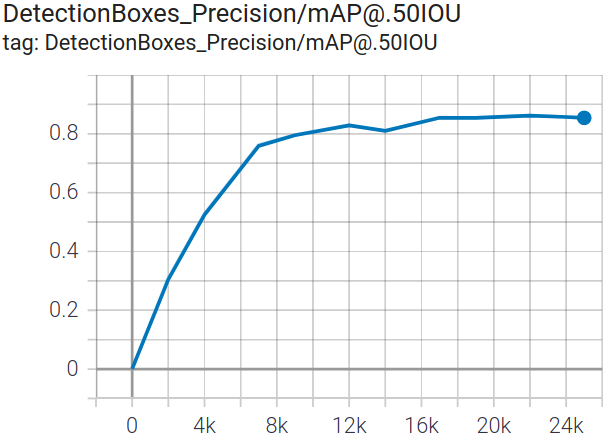

In [116]:
IPython.display.Image(filename = f"{figures_dir}/iou_50.png", width = 400)

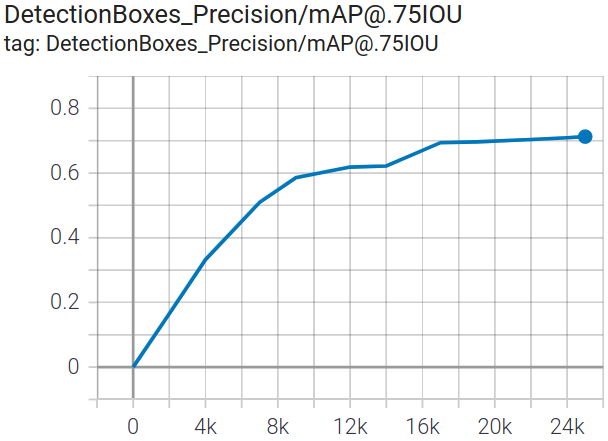

In [117]:
IPython.display.Image(filename = f"{figures_dir}/iou_75.png", width = 400)

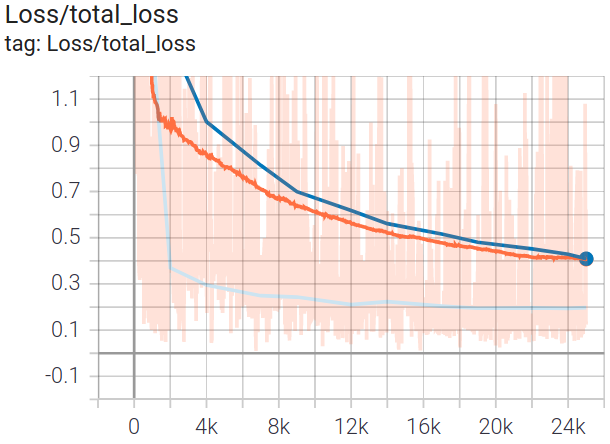

In [113]:
IPython.display.Image(filename = f"{figures_dir}/total_loss.png", width = 400)

### While mAP for the model shows that there was a little improvement after 8000 steps the 0.10 gain in IoU .75 metric improves accuracy of the detection (Freezed on 12000 the model gives 65% detections in my inference test). Morover 25000 steps checkpoint was chosen as the last checkpoint because at 26000 overfitting started to show, thus it was the best point to freeze the model and retain the best detection capabilities possible. The overall time of the training was 1h 47min 13s which is considered as rather quick training.

### The results of the best model are very satisfying and the model should be capable of correct detection of birds in most of the situations considered by Autumnwatch. As camera traps setup is usually made in such a way that camera is very close to the place intended for the bird to stay. Static position of a bird should increase the detection ability of the model.

### <b>6.2 Limitations</b>

### An limitation of the trained model is its inability to detect birds at night. Observation of birds is often carried out at night thus it would be benfeicial to have a model that would detect birds at night. Of course this task was focused on the detection based on pictures provided from which all were taken during the day.
### From 1000 images per class provided for this task 800 pictures per class were used in the final training setup. Overall number of images available for the task is considered as small. It would be beneficial to increase the number of images to at least 5000 per class or even more. It is possible that the model trained on much grater dataset would perform even better.
### While tagging was perform carefuly it is always possible to do it better. Morover choice of better images could have been better. It was observed that models struggle with detection of young birds. This problem might be the result of great similarities of young birds. Moreover young birds not only are smaller but also often vary greatly in color from the adults. Some of them are being detected so model learned about the from reduced number of images of young birds. However it would be probably better to remove them from the dataset or create new classes for them. Erithacus Rubecula and Turdus merula young birds are very similar thus these species may be misclasified.
### It is much easier to detect certain objects if they vary greatly in shape. While detection of a bird shape is not a difficult task the correct detection of species is problematic due to great similarities. More features than shape are required to appropriately detect bird species thus training is more difficult.

### <b>6.3 Future Work</b>

### As it was already mentioned in previous section the future work can include deployment of the developed model in a camera trap.
### Future work may also involve creation of the improved model using greater number of images and application of other augmentation methods. Morover collection of night pictures of birds would allow training of the model that would be capable of detecting birds during the night as well.